# DS6200 HW #1. Improve code Efficiency: Sort First!

## Description.

In this assingment, we will investigate the time complexity of a specific algorithm provided in the scenario below and propose updated algorithm that can achieve lower time complexity than that of the existing one. By comparing the running time of the two algorithms, you will better understand the significance of the time complexity in the measurement of the efficiency of the algorithm.


## Scenario. 

In a two-class classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs. 

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.) 

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [1]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax

Answer Question #1 in the comments of the code chunk below. 

In [2]:
def computeAllTPRs(true_label, confs):
    '''

    inputs:
      - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
      - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''

    # Define / initialize  variables
    sentinelValue = -1  #O(1) 
    totalPositives = sum(true_label) #O(n)
    totalNegatives = len(true_label) - totalPositives #O(1)
    #print(true_label)
    truePositives = 0 #O(1)
    falsePositives = 0 #O(1)
    # Hint: Consider Memory Management
    truePositiveRate = [] #O(1)
    falsePositiveRate = [] #O(1)

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embeded loop ie, O(n^2) ... do you see why??
    #Hint: If you sort the confidences first you can improve the iteration scheme.
    
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate , falsePositiveRate lists. 

    for i in range(len(confs)): #O(n) iterations
      maxVal = max(confs)  #O(n) each iteration
      argMax = argmax(confs) #O(n) for each iteration as well
      confs[argMax] = sentinelValue #O(1) 
      #print(argMax)
      if true_label[argMax]==1: #O(1)
        truePositives += 1 #O(1)
      else:
        falsePositives += 1 #O(1)

      truePositiveRate.append(truePositives/totalPositives) #O(1)
      falsePositiveRate.append(falsePositives/totalNegatives) #O(1)
      #print(truePositiveRate)
    return (truePositiveRate, falsePositiveRate) #O(1)
    #Total work inside the loop =O(n) per iteration
    # Loop runs n times => O(n^2) overall
    
    #**FINAL ANSWER**##
    #Overll: T(n) = O(n) + O(n^2) + O(1) = O(n^2)
    
    # Plot FPR vs TPR for all possible thresholds 
    # plt.plot(falsePositiveRate,truePositiveRate, label ='class' + str(i) + ' to all')
    # plt.legend()
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.show()
    #the plot would be O(n) but it is ignored since it is commented out.


In [3]:
def testComputeAllTPRs(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  #numSamples = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5: 
      lab = 1 
    else: 
      lab = 0
    labels.append(lab)
  #print(labels)
  computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here?
  #Do a deepcopy to avoid the side effects from in-place modifactions in our original function 

Below, provide your implementation for Question #2.

In [4]:
def computeAllTPRs_improved(true_label, confs):
    '''
    For the improved version of computeAllTPRs,
    use sorting instead of repeatedly scanning for max values.
    Overall time complexity should be  O(nlogn)
    Final T(n) should be at the bottom but it will also be T(n) = O(nlogn)
    '''

    sentinelValue = -1               #O(1)
    totalPositives = sum(true_label) #O(n)
    totalNegatives = len(true_label) - totalPositives #O(1)
    truePositives = 0                #O(1)
    falsePositives = 0               #O(1)
    truePositiveRate = []            #O(1)
    falsePositiveRate = []           #O(1)

    #Pair confidences with labels and then sort by confidence descending
    paired = list(zip(confs, true_label))   #O(n)
    paired.sort(key=lambda x: x[0], reverse=True) #O(nlogn)

    # Sweep through sorted pairs once
    for conf, label in paired:       #Loop runs n times => O(n)
        if label == 1:               #O(1)
            truePositives += 1       #O(1)
        else:
            falsePositives += 1      #O(1)

        truePositiveRate.append(truePositives / totalPositives)   #O(1)
        falsePositiveRate.append(falsePositives / totalNegatives) #O(1)

    # Overall:
    # T(n) = O(n)[sum] + O(n)[zip] + O(n log n)[sort] + O(n)[loop] + O(1) = O(nlogn)


Question #3. Below, provide your code which records and plots the runtime for the original and improved methods. The  code below can be used for reference.

In [5]:
import time

# Record the time results
slowTPR = []
fastTPR  = []
sample_size = []

size = 10001
stepSize = 1000
## Calculate the time required to compute at various sample sizes
for i in range(0, size, stepSize):
    ## Generate the random numSamples
    NumSamples = i
    
    
    ## Do the inefficient TPR computation
    start = time.perf_counter()
    testComputeAllTPRs(NumSamples)
    slowTPR.append(time.perf_counter() - start)
    
    ## Do the improved TPR computation
    start = time.perf_counter()
    testComputeAllTPRs_improved(NumSamples)  
    fastTPR.append(time.perf_counter() - start)

    sample_size.append(NumSamples) 

print(sample_size)
## Plot the results
plt.plot(range(0, size, stepSize), slowTPR, label = 'Slow TPR Computation')
plt.plot(range(0, size, stepSize), fastTPR, label = 'Improved TPR Computation')
#plt.plot(range(0, size, stepSize), defaultTime, label = 'Default')
plt.legend(frameon = 'none')
plt.title('Time Comparison of TPR Computations')
plt.xlabel('Sample Size')
plt.ylabel('Time')
plt.show()


NameError: name 'testComputeAllTPRs_improved' is not defined

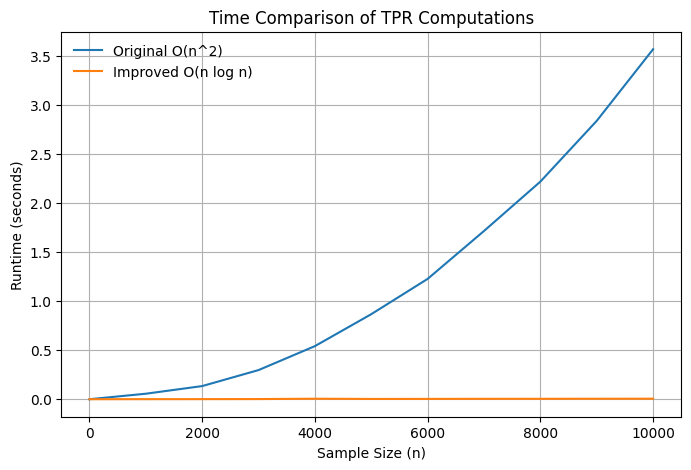

In [6]:
import time
import random
from copy import deepcopy
import matplotlib.pyplot as plt

#Using the wrapper for the original (inefficient) method
def testComputeAllTPRs(numSamples):
    confList = []
    labels = []
    maxVal = 10000
    for i in range(numSamples):
        n = random.randint(1, maxVal)
        confList.append(n / maxVal)
        labels.append(1 if n / maxVal > 0.5 else 0)
    computeAllTPRs(labels, deepcopy(confList))

#Also using the wrapper for the improved method
def testComputeAllTPRs_improved(numSamples):
    confList = []
    labels = []
    maxVal = 10000
    for i in range(numSamples):
        n = random.randint(1, maxVal)
        confList.append(n / maxVal)
        labels.append(1 if n / maxVal > 0.5 else 0)
    computeAllTPRs_improved(labels, deepcopy(confList))

#Record runtimes
slowTPR = []
fastTPR = []
sample_size = []

max_size = 10001
stepSize = 1000

for NumSamples in range(0, max_size, stepSize):
    sample_size.append(NumSamples)
    
    #That Time original method
    start = time.perf_counter()
    testComputeAllTPRs(NumSamples)
    slowTPR.append(time.perf_counter() - start)
    
    #That Time improved method
    start = time.perf_counter()
    testComputeAllTPRs_improved(NumSamples)
    fastTPR.append(time.perf_counter() - start)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(sample_size, slowTPR, label='Original O(n^2)')
plt.plot(sample_size, fastTPR, label='Improved O(n log n)')
plt.title('Time Comparison of TPR Computations')
plt.xlabel('Sample Size (n)')
plt.ylabel('Runtime (seconds)')
plt.legend(frameon=False)
plt.grid(True)
plt.show()
